## Analysis
- Overall temperature data follows an expected pattern with the higher temperatures at latitudes closer to 0 (equator). Interestingly, the northern hemisphere has a much stronger correlation. Based on the figures in the starter code, it seems to depend on the season. The winter season shows a stronger correlation between temperature and latitude. Apparently, weather patterns and currents during the warmer seasons distribute heat across latitudes more effectively, plus other complex factors may be at work.


- Humidity is weakly positively correlated with latitude in the northern hemisphere. Anecdotal evidence seems to indicate that northern latitudes tend to have more cloudy days with drizzle and snow in the colder months. As we approach the equator, the variance in humidity seems to increase significantly. While there are plenty of lush, tropical regions, there are also plenty of drier regions like parts of southern US, parts of Mexico, central to northern Africa, the Middle East, and parts of Asia.


- Wind speed and cloudiness don't seem to correlate much, if at all, by latitude. This, however, is not too surprising because unlike temperature, there's not much reason to think there should be a correlation. Wind speed and cloudiness are more complex weather phenomena that can easily vary day to day regardless of latitude and temperature.

## Setup

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citypy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Lists for holding coords and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Create list to store responses to retrieve data from later
responses = []

# Counters
record = 1
setnum = 1

# Setting up API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "Imperial"

print("Beginning Data Retrieval")
print("------------------------------")

# Loop through list of cities and make a query for each
for city in cities:
    query = f"{base_url}{city}&appid={weather_api_key}&units={units}"
    
    try:
        response = requests.get(query).json()
        city_name = response["name"]
        print(f"Processing Record {record} of Set {setnum} | {city_name}")
        
        responses.append(response)
        
        if record < 50:
            record += 1
        
        # Once at 50, reset counter, go to next set, and pause API calls for 60s
        else:
            record = 1
            setnum += 1
            time.sleep(60)
            
    except:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | Shahdad Kot
Processing Record 2 of Set 1 | Faanui
Processing Record 3 of Set 1 | Busselton
Processing Record 4 of Set 1 | East London
Processing Record 5 of Set 1 | Ribeira Grande
Processing Record 6 of Set 1 | Mar del Plata
Processing Record 7 of Set 1 | Albany
Processing Record 8 of Set 1 | Kieta
Processing Record 9 of Set 1 | Batemans Bay
Processing Record 10 of Set 1 | San Patricio
Processing Record 11 of Set 1 | Jamestown
Processing Record 12 of Set 1 | Anadyr
Processing Record 13 of Set 1 | El Alto
Processing Record 14 of Set 1 | Bethel
Processing Record 15 of Set 1 | Susanville
City not found. Skipping...
Processing Record 16 of Set 1 | Thompson
Processing Record 17 of Set 1 | Yellowknife
Processing Record 18 of Set 1 | Talnakh
Processing Record 19 of Set 1 | Paamiut
Processing Record 20 of Set 1 | Ushuaia
Processing Record 21 of Set 1 | Chokurdakh
Processing Record

Processing Record 34 of Set 4 | Bålsta
Processing Record 35 of Set 4 | Hazorasp
Processing Record 36 of Set 4 | Tuktoyaktuk
Processing Record 37 of Set 4 | Pochutla
City not found. Skipping...
Processing Record 38 of Set 4 | Vaini
Processing Record 39 of Set 4 | Ballina
Processing Record 40 of Set 4 | Castro
City not found. Skipping...
Processing Record 41 of Set 4 | Morondava
City not found. Skipping...
Processing Record 42 of Set 4 | Barrow
City not found. Skipping...
Processing Record 43 of Set 4 | Namatanai
Processing Record 44 of Set 4 | Tiznit Province
Processing Record 45 of Set 4 | Berlevåg
Processing Record 46 of Set 4 | Bulgan
Processing Record 47 of Set 4 | Port Augusta
Processing Record 48 of Set 4 | Katsuura
Processing Record 49 of Set 4 | Northam
Processing Record 50 of Set 4 | Río Gallegos
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 5 | Chui
Processing Record 2 of Set 5 | Grottammare
Processing Record 3 of Set 5 | Tessalit
Processin

Processing Record 19 of Set 8 | Pontianak
Processing Record 20 of Set 8 | Wuhu
Processing Record 21 of Set 8 | Lata
Processing Record 22 of Set 8 | Trebinje
Processing Record 23 of Set 8 | Exu
Processing Record 24 of Set 8 | Vacaria
Processing Record 25 of Set 8 | Poum
Processing Record 26 of Set 8 | Kondrovo
Processing Record 27 of Set 8 | Springbok
Processing Record 28 of Set 8 | Malé
Processing Record 29 of Set 8 | Fortuna
Processing Record 30 of Set 8 | Rocha
Processing Record 31 of Set 8 | Baculin
Processing Record 32 of Set 8 | Komyshuvakha
Processing Record 33 of Set 8 | Vardø
Processing Record 34 of Set 8 | Zhangaözen
Processing Record 35 of Set 8 | Jiangyou
Processing Record 36 of Set 8 | Namwala
Processing Record 37 of Set 8 | Usinsk
Processing Record 38 of Set 8 | Lara
Processing Record 39 of Set 8 | Dekernes
Processing Record 40 of Set 8 | Rehoboth
Processing Record 41 of Set 8 | Nizhneudinsk
Processing Record 42 of Set 8 | Taos
Processing Record 43 of Set 8 | Panzhihua
Pro

## Convert Raw Data to DataFrame

In [5]:
city_data = pd.DataFrame({"City": [res["name"] for res in responses],
             "Lat": [res["coord"]["lat"] for res in responses],
             "Lng": [res["coord"]["lon"] for res in responses],
             "Max Temp": [res["main"]["temp_max"] for res in responses],
             "Humidity": [res["main"]["humidity"] for res in responses],
             "Cloudiness": [res["clouds"]["all"] for res in responses],
             "Wind Speed": [res["wind"]["speed"] for res in responses],
             "Country": [res["sys"]["country"] for res in responses],
             "Date": [res["dt"] for res in responses]})

city_data.to_csv(output_data_file, index=False)

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shahdad Kot,27.8477,67.9055,64.40,21,0,3.91,PK,1643344766
1,Faanui,-16.4833,-151.7500,81.01,76,10,16.46,PF,1643344767
2,Busselton,-33.6500,115.3333,88.05,29,0,4.38,AU,1643344767
3,East London,-33.0153,27.9116,72.54,83,40,16.11,ZA,1643344768
4,Ribeira Grande,38.5167,-28.7000,59.31,74,9,4.81,PT,1643344768


In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.487122,23.955328,51.359374,72.774597,57.971377,7.718497,1.643345e+09
std,33.202769,88.555242,29.717359,20.203339,39.724760,5.851020,9.088373e+01
min,-54.800000,-179.166700,-39.060000,15.000000,0.000000,0.000000,1.643344e+09
25%,-8.802200,-51.716650,31.465000,63.000000,17.000000,3.440000,1.643345e+09
50%,21.402200,26.438400,61.320000,76.000000,71.000000,6.550000,1.643345e+09
75%,45.697900,102.382750,75.040000,88.500000,99.000000,10.360000,1.643345e+09
max,78.218600,179.316700,96.510000,100.000000,100.000000,36.350000,1.643345e+09


## Plotting the Data

### Temperature vs. Latitude Plot

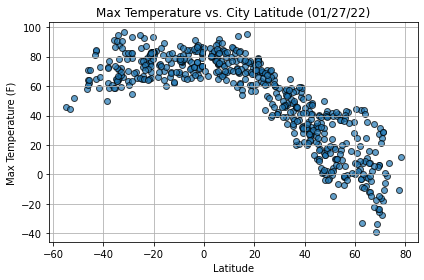

In [13]:
xs = city_data['Lat']
ys = city_data['Max Temp']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Max Temperature vs. City Latitude (01/27/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig1.png")
plt.show()

This figure shows the highest temperature in degress Fahrenheit recorded in over 500 randomly selected cities plotted against the latitude of each city. Data was obtained from the OpenWeatherMap API on 1/27/2022.

### Humidity vs. Latitude Plot

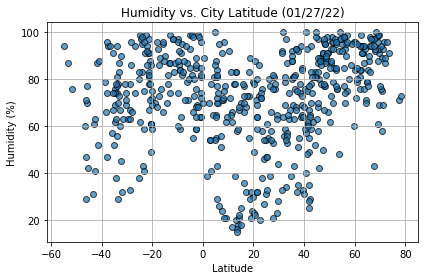

In [14]:
xs = city_data['Lat']
ys = city_data['Humidity']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Humidity vs. City Latitude (01/27/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig2.png")
plt.show()

A scatter plot showing the humidity percentage of over 500 randomly selected cities against the latitude of each city. Data was obtained from the OpenWeatherMap API on 1/27/2022.

### Cloudiness vs. Latitude Plot

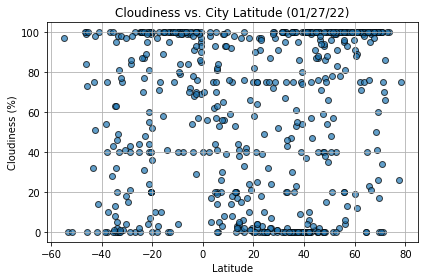

In [15]:
xs = city_data['Lat']
ys = city_data['Cloudiness']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Cloudiness vs. City Latitude (01/27/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig3.png")
plt.show()

A scatter plot of the cloudiness (as a percentage) of over 500 randomly selected cities against the latitude of each city. Data was obtained from the OpenWeatherMap API on 1/27/2022.

### Wind Speed vs. Latitude Plot

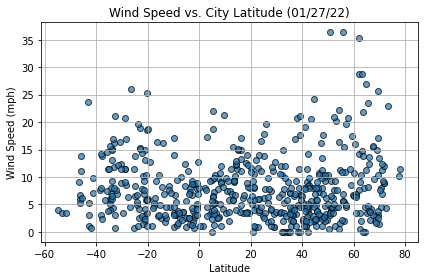

In [16]:
xs = city_data['Lat']
ys = city_data['Wind Speed']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Wind Speed vs. City Latitude (01/27/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig4.png")
plt.show()

A scatter plot of the wind speed in mph of over 500 randomly selected cities against the latitude of each city. Data was obtained from the OpenWeatherMap API on 1/27/2022.

## Linear Regression

In [17]:
# Split Data Frame into Northern and Southern Hemispheres
north_df = city_data[city_data["Lat"] >= 0]

south_df = city_data[city_data["Lat"] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7830


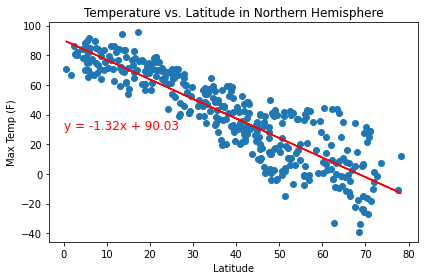

In [30]:
xs = north_df["Lat"]
ys = north_df["Max Temp"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [0, 30], fontsize=12, color='r')
plt.title("Temperature vs. Latitude in Northern Hemisphere")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

# Display and save image
plt.savefig("output_data/fig5a")
plt.tight_layout()
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1255


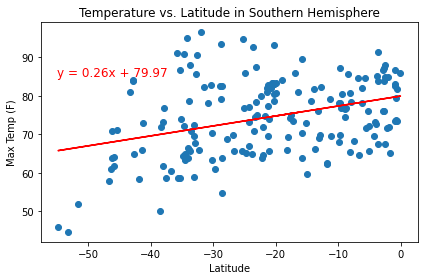

In [31]:
xs = south_df["Lat"]
ys = south_df["Max Temp"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter Plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Temperature vs. Latitude in Southern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 85], fontsize=12, color='r')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig5b")
plt.tight_layout()
plt.show()

The plot for the northern latitudes shows a strong negative correlation between the temperature and latitude as one would expect. Interestingly, for the southern hemisphere, there appears to be a very weak positive correlation. This could indicate that the correlation is much stronger during the winter months due to the nature of weather patterns.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2260


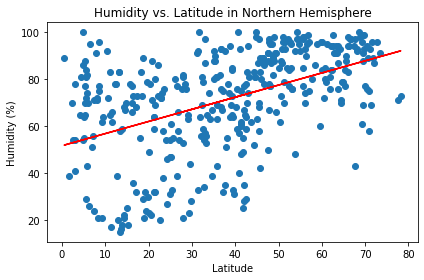

In [32]:
xs = north_df["Lat"]
ys = north_df["Humidity"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Humidity vs. Latitude in Northern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [50, 10], fontsize=12, color='r')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig6a")
plt.tight_layout()
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0918


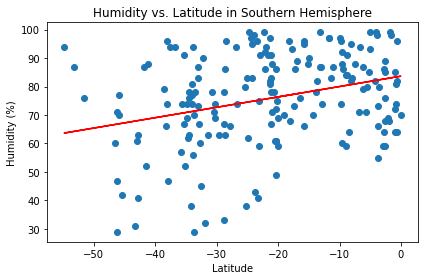

In [33]:
xs = south_df["Lat"]
ys = south_df["Humidity"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Humidity vs. Latitude in Southern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-20, 20], fontsize=12, color='r')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig6b")
plt.tight_layout()
plt.show()

The regressions for the humidity show almost no correlation in the southern hemisphere and a very weak positive correlation in the northern hemisphere. This may be surprising to some as we often think of tropical places as being more wet. However, the data seems to show that there is plenty of diversity in wet and dry climates across the latitudes.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0887


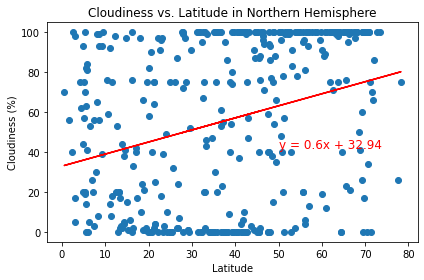

In [34]:
xs = north_df["Lat"]
ys = north_df["Cloudiness"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter Plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Cloudiness vs. Latitude in Northern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [50, 42], fontsize=12, color='r')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig7a")
plt.tight_layout()
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1396


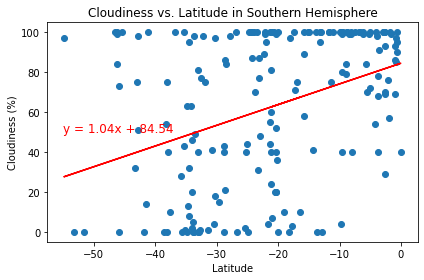

In [35]:
xs = south_df["Lat"]
ys = south_df["Cloudiness"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Cloudiness vs. Latitude in Southern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 50], fontsize=12, color='r')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig7b")
plt.tight_layout()
plt.show()

There seems to be a weak to no correlation in cloudiness across all latitudes. Not too surprising since cloudiness is probably related to humidity, which showed to have weak correlations, and other complex factors. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0177


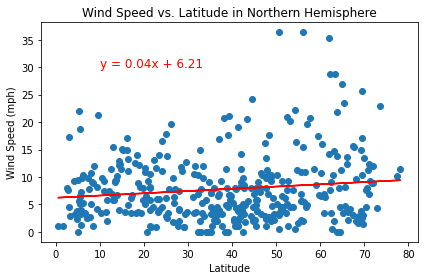

In [36]:
xs = north_df["Lat"]
ys = north_df["Wind Speed"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Wind Speed vs. Latitude in Northern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [10, 30], fontsize=12, color='r')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig8a")
plt.tight_layout()
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0463


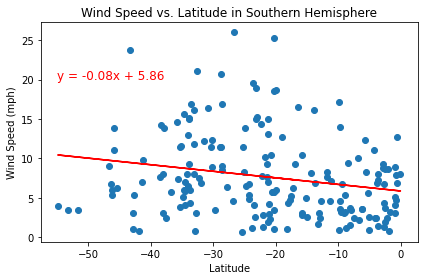

In [37]:
xs = south_df["Lat"]
ys = south_df["Wind Speed"]

# Regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-squared is: {r**2:.4f}")
regress = [m*x + b for x in xs]

# Scatter plot
plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

# Title, labels, and annotation
plt.title("Wind Speed vs. Latitude in Southern Hemisphere")
plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 20], fontsize=12, color='r')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Display and save figure
plt.savefig("output_data/fig8b")
plt.tight_layout()
plt.show()

There is no correlation between wind speed and latitude for both northern and southern hemispheres. Not too surprising according to common experience since wind can vary significantly regardless of latitude and there is little reason to expect a correlation with latitude.